<div style="text-align: center; font-size: 30px;">
Statistics Labs<br/>
</div>
<div style="text-align: center; font-size: 30px;">
Common probability distributions
</div>
<div style="text-align: center; font-size: 16px; font-style: italic">
Material prepared by M. Dolores Frías, Jesús Fernández, and Carmen M. Sordo, senior lectures from the Department of Applied Mathematics and Computer Science at the University of Cantabria.
</div>

# Objectives

The concept of a random variable allows us to mathematically work with the outcomes of a random experiment and fully characterize the probability of occurrence of any event associated with the experiment. In practice, many situations are characterized by the same random variables (except for some parameters that need to be defined to adjust the distribution function to the specific situation). These common random variables enable us to approach numerous practical situations and solve realistic problems.

The use of computers, and R in particular, will allow us to evaluate the probabilities of events associated with common random experiments, including situations for which we have not seen a simple analytical expression in theory. Additionally, it will enable us to simulate random samples from these common experiments and represent probability mass functions (PMF), probability density functions (PDF), or cumulative distribution functions (CDF) of these distributions.

# Probability distributions in R

In theory, we have seen analytical formulas for probability functions ($p_X(x)$) or probability density functions ($f_X(x)$) for several common distribution models. There are distributions for which the cumulative distribution function ($F_X(x)$), despite being easily computable through a summation or an integral, is too laborious to calculate manually or with a basic calculator.

R's base package provides PMFs, PDFs and CDFs for all the common random variables covered in class, as well as some additional ones.

The following table highlights in bold the distributions covered in class, along with their names in R and the parameters that can be passed to the functions. As you can see, the table includes more common distributions beyond those studied in class.

<div><img alt="Resumen distribuciones comunes" src="./figuras/tabla_distcomunes_en.png" width="400"/></div>

## Probability Mass Function (PMF) and Probability Density Function (PDF)

For each of these random variables, R provides a probability mass function if the variable is discrete or a probability density function if the variable is continuous, by adding the prefix `d` to the name that R assigns to that common distribution in both cases. 

In each case, at a minimum, the value of the variable for which the probability or probability density is to be calculated must be provided, along with the parameters of the common distribution, in a manner very similar to the notation we use in class.

As observed in the previous table, the input parameters vary for each distribution, so it is recommended to check the help documentation in each case.  
For example, the command `?dbinom` provides information on how to use this function.

In [1]:
?dbinom

Binomial {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
size,number of trials (zero or more).
prob,probability of success on each trial.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X \le x], otherwise, P[X > x]."


As shown in the help, `x` represents the value of the random variable for which the probability function is to be evaluated ($p_X(x)=P(X=x)$), `size` is the sample size (n), and `prob` is the probability of success (p) of the Bernoulli trial.

For example, to calculate the binomial probability function evaluated at 7, where we have 20 independent Bernoulli trials, each with the same success probability of 0.5, that is:

$p_{B(20;0;5)}(7)\equiv p_{B(7; 20 ; 0 ; 5)}$ 

we execute the following command:

In [3]:
# P(X=7) with X ~ B(20, 0.5)
n <- 20
p <- 0.5
dbinom(7, n, p)

[1] 0.07392883

As we know, this probability would correspond, for example, to the probability of getting 7 heads in 20 coin flips, since in this random experiment, the probability of success is 0.5.

When the variable under study is a continuous random variable, the prefix `d` provides the value of the probability density function evaluated at a specific value of that random variable. For example:

In [18]:
dnorm(170, 150, 0.8)

[1] 9.567412e-137

provides the density function value of a normal random variable ($F_{N(150,0.8^2)}(170)$) with a mean of 150 and a standard deviation of 0.8, evaluated at 170.  

## Cumulative Distribution Function (CDF)

Similarly, by using the prefix `p`, we obtain the cumulative distribution function.

For example, the probability of getting 7 heads or fewer in 20 coin flips:

$F_{B(20;0;5)}(7)\equiv F_{B(7;20;0;5)}$

is obtained in R as:

In [19]:
# P(X<=7) with X ~ B(20, 0.5)
pbinom(7, 20, 0.5)

[1] 0.131588

Note that, once again, the first argument of the function is the value of the random variable at which we want to evaluate the cumulative distribution function, followed by the necessary parameters in the order they appear in the previous table.

To better understand how to compute the different options in R, let's solve a typical exercise similar to those discussed in class. This way, we can use R to verify the results obtained by applying the formulas covered in class.

*A batch of computer processors contains 40% defective units. Since the error is detected only after all processors from the batch have been installed in computers, the quality control manager decides to inspect some computers that include a processor from this batch. A computer will be considered defective if the processor is faulty.*

1. *Calculate the probability that fewer than 4 computers have a defective processor out of a total of 20 inspected computers.*

The random variable X represents the number of defective computers out of the 20 inspected. This variable follows a binomial distribution, B(n=20, p=0.4), since the experiment consists of repeating Bernoulli trials (analyzing a computer results in two possible outcomes: success (it has a defective processor) or failure (the processor is functioning properly)). Additionally, these trials are independent and share the same probability of success, p=0.4.

Thus, the required probability is $P(X\leq 3) = F_{B(20,0.4)}(3)$: 

In [2]:
# P(X<=3) with X ~ B(20, 0.4)
n <- 20
p <- 0.4
pbinom(3,n,p)

[1] 0.01596116

That is, the probability that fewer than 4 computers have a defective processor out of a total of 20 inspected computers is 0.01596116.

Note that the first argument of the function is the value of the random variable at which we want to evaluate the cumulative distribution function, followed by the necessary parameters in the order they appear in the previous table (`size, prob`).

2. *And what is the probability that more than 3 are defective?*

Our random variable X remains the same, representing the number of defective computers out of 20 inspected, and it still follows a binomial distribution, B(n=20, p=0.4). 

In this case, the probability we need to compute is: $P(X>3) = 1-F_{B(20,0.4)}(3)$ which is given by:

In [21]:
# P(X>3) with X ~ B(20, 0.4)
1-pbinom(3,n,p)

[1] 0.9840388

We obtain that the probability that more than 3 computers have a defective processor out of a total of 20 inspected computers is 0.98.

If we look at the help documentation mentioned earlier, this function allows us to calculate P(X > 3) directly by setting the argument `lower.tail` to `FALSE`.

In [22]:
pbinom(3,n,p, lower.tail=FALSE)

[1] 0.9840388

3. *And what is the probability that exactly 5 out of the 20 inspected computers are defective?*

Our random variable X remains the same, representing the number of defective computers out of a total of 20 inspected, following a binomial distribution, B(n=20, p=0.4). However, in this case, we need to calculate $P(X=5) = p_{B(20,0.4)}(5)$, which is given by:

In [23]:
# P(X=5) with X ~ B(20, 0.4)
dbinom(5,n,p)

[1] 0.07464702

Therefore, the probability that exactly 5 computers out of 20 inspected have a defective processor is 0.075.

4. *Calculate the probability of finding the first defective computer when inspecting the seventh unit.*

In this case, the random variable changes since we are now interested in counting the number of computers inspected until the first defective one is found. This new variable, which we will call Y, follows a geometric distribution, G(p=0.4), as it counts the number of independent Bernoulli trials, each with the same probability of success, until the first success (defective processor) occurs.

The probability we need to calculate is $P(Y = 7) = p_{G(0,4)}(7)$, which, using the formula seen in class, results in 0.0186624.

As you will see in the help documentation for the geometric distribution (`?dgeom`), R defines the geometric variable differently from how we did in class. In R, the random variable K represents the number of failures before the first success in a series of independent Bernoulli trials with the same probability of success.

In theory, we defined the geometric variable as the one that counts the number of trials up to and including the first success. That is, $Y = K + 1$ (since K does not count the success). The probability function seen in theory can be obtained from R's definition using:

$p_Y(y) = P(Y = y) = P(K + 1 = y) = P(K = y − 1) = p_K(y − 1)$

According to this definition, if K is the random variable representing the number of failures until the first success, in R the probability we need to calculate  ($P(K = 6)$) is given by:

In [1]:
# P(Y=7) with Y ~ G(0.4)
dgeom(6,0.4)

[1] 0.0186624

As we can see, this is a shifted version of the definition we used in theory. We could define new R functions that allow us to perform the calculations according to the definition of the geometric random variable used in theory as follows:

In [24]:
# Probabiltiy mass function of G(p)
dG <- function(x,p) {dgeom(x-1,p)}
# Cumulative distribution function of G(p)
pG <- function(x,p) {pgeom(x-1,p)}

And in this way, the value of the probability we are asked to calculate, $P(Y = 7)$, would be computed as:

In [4]:
# P(Y=7) with Y ~ G(0.4)
dG(7,0.4)

[1] 0.0186624

As we see, the probability of finding the first defective processor on the seventh computer is 0.0187.

5. *Calculate the probability that the tenth reviewed computer is the fourth non-defective one.*

In this case, we define a new random variable W, which will represent the number of computers reviewed until the fourth non-defective computer is found. This variable follows a negative binomial distribution, BN(r=4, p=0.6), since we are counting the number of independent Bernoulli trials, each with the same probability of success, until the fourth success (defective processor) occurs.

The probability we need to calculate is $P(W = 10) = p_{BN(4,0,6)}(10)$, which, calculated using the formulation seen in class, results in 0.04459069.

If you consult the help for the Negative Binomial distribution provided by R (`?dnbinom`), you will notice that this distribution defines the random variable K as the number of failures before obtaining r successes, rather than the definition we used in class for the negative binomial variable, which counts the number of trials until reaching r successes. In other words, W = K + r.

The variable K also follows a negative binomial distribution, and its probability function is as follows:

$ p_K(k)=\left(\begin{array}{c}
k+r-1\\r-1
\end{array}\right) p^r (1-p)^k,\;\; k\geq 0
$

According to this definition, in R the probability we need to calculate will be given by:

In [5]:
# P(W=10) with W ~ BN(4,0.4)
dnbinom(6,4,0.6)

[1] 0.04459069

Resulting that the probability that the tenth computer reviewed is the fourth non-defective one is 0.045.

The definition of the hypergeometric random variable in R is also not identical to the one we saw in class. Just like we did for the geometric variable, functions can be defined in R to represent the definitions of the negative binomial and hypergeometric variables as seen in theory. Use R's help to view the definitions of these two variables (`?dhyper` and `?dnbinom`).

## Quantile Function

For each of the given random variables, the quantile function ($F_X^{-1}(p)$) can be obtained using the prefix `q`.  

Taking as an example the first part of the processor exercise, where we found that $P(X\leq 3) = F_{B(20,0.4)}(3)=0.01596116$, we can obtain the smallest value $X$ ($c$) such that $P(X\le c)> 0.01596116$, given that $X\sim B(20,0.4)$:

In [3]:
# P(X<=c) with X ~ B(20, 0.4)
qbinom(0.01596116,n,p)

[1] 3

which turns out to be 3 computers. Note that, in this case, the first argument is the probability, followed by the parameters in the order specified in the table.

The first quartile of that same distribution is given by:

In [4]:
# Q1 with X ~ B(20, 0.4)
qbinom(0.25,n,p)

[1] 6

It can be verified that the value of the variable x=6 is indeed the first quartile:

In [5]:
# P(X<=5) with X ~ B(20, 0.4)
pbinom(5,n,p)

[1] 0.125599

For x=5, the value of the distribution function is less than 0.25. Then, we calculate what happens with x=6: 

In [6]:
# P(X<=6) with X ~ B(20, 0.4)
pbinom(6,n,p)

[1] 0.2500107

Here, the value exceeds 0.25, so Q1=6 computers.

As we mentioned before, in R, the definition of a geometric variable is a shifted version of the one used in theory. Therefore, we could also define a new R function to compute the quantiles for this distribution according to the class definition:

In [7]:
# Quantil function for G(p)
qG <- function(x,p) {1+qgeom(x,p)}

Which we could use, for example, to determine the median ($C_{0.5}$) of a G(0.4) distribution.

In [8]:
# P(Y<=y)>=0.5 with Y ~ G(0.4)
qG(0.5,0.4)

[1] 2

<div class="alert alert-block alert-info">
<strong>PRACTICE ON YOUR OWN</strong>

- Define new functions (BN and HG, with prefixes d, p, and q) that correspond to the definitions seen in class for the negative binomial and hypergeometric distributions.
    
- Given a random variable X that follows a B(200,0.4), solve the following:
  1. $P(X<71)$
  2. $P(X\geq 90)$
  3. $F_X(100)$
  4. $P(X\leq x)\geq0.4$
  5. $P(X\geq x)\geq0.8$
  6. $P(X=60)$
     
</n>

- A random variable X is uniformly distributed in the interval (2,4). Solve the following:
  1. $P(X<2.5)$
  2. $P(X\geq 3.2)$
  3. $P(2.2 < X < 3.5)$
  4. $P(X\leq x)=0.4$
  5. $P(X\geq x)=0.8$
  6. $F_X(2.7)$

</n>

- The telephone switchboard of a hotel receives calls per minute following a Poisson distribution with parameter $\lambda=0.5$. Determine the probability that in a randomly chosen minute:
    1. Exactly one call is received.
    2. At most two calls are received.
    3. The switchboard gets blocked, knowing that it cannot handle more than three connections per minute.

</div>

## Random samples

Finally, the prefix `r` (short for random) allows us to obtain random values from a given random variable. In other words, it enables us to generate specific values $x$ from a random variable $X$. Put differently, it simulates an experiment that follows a certain distribution.

With common distribution functions, we can simulate experiments with both continuous and discrete variables that have a countably infinite sample space.

For example, we can obtain a random sample from a binomial distribution $B(20,0.5)$:

In [9]:
# Random values from a B(20,0.5)
n <- 20
p <- 0.5
rbinom(10,n,p)

[1]  9 10 16 10  9  8  9  6  8 10

These would be 10 possible outcomes of a binomial experiment in which 20 Bernoulli trials are conducted with a success probability of 0.5. That is, the first value indicates the number of successes obtained after performing 20 Bernoulli trials. Each time the previous command is repeated, the obtained values change since this is a random experiment.

Similarly, random samples can be obtained from any other distribution:

In [10]:
rnorm(15)          # Sample of size 15 from N(0,1)
rnorm(10, 165, 5)  # Sample of size 10 from N(165,sd=5)
rpois(10, 5)       # Sample of size 10 from Po(5)

[1]  1.6486707  0.4305452 -1.5486584 -0.4834944 -0.2562453 -1.6805130
 [7] -0.2959180 -0.4989940  0.2407149  0.1252613  0.4261730  0.1251601
[13]  1.0811764 -1.6705981 -1.4218416

[1] 161.9860 171.1990 173.1729 160.5326 171.5400 158.4627 163.5854 170.2760
 [9] 162.9213 170.2738

[1] 6 8 7 2 5 5 2 6 7 6

As you can see, the R functions corresponding to the normal distribution take the mean and standard deviation as parameters, not the variance. Additionally, when working with the standard normal distribution (N(0,1)), it is not necessary to specify these two parameters, as they are set by default.

# Representing probability distributions

In R, it is possible to plot distribution functions (or any other function) using the `curve` function. For example, to plot the standard normal density function between -4 and 4, we use:

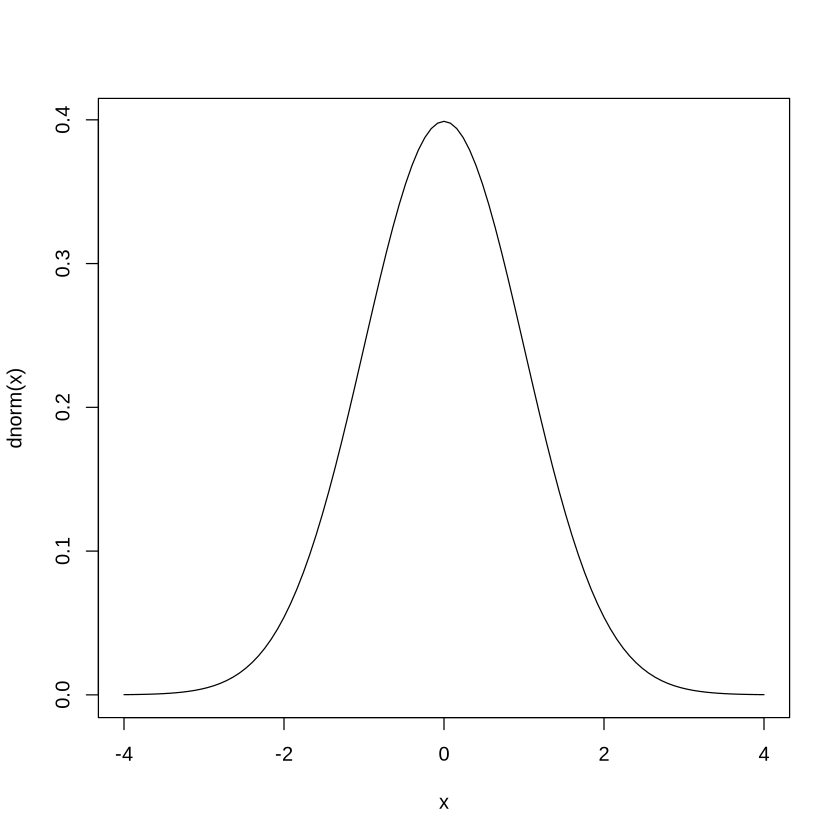

In [15]:
# N(0,1)
curve(dnorm(x), -4, 4)

The name `x`, which we use as the first argument, is interpreted by the `curve` function as the independent variable to be represented.

We can improve the appearance of the plot by using common arguments in plotting functions. For example, we can label the axes (with `xlab` and `ylab`), change the color (`col`) or the line width (`lwd`), or add a title (`main`) to the plot:

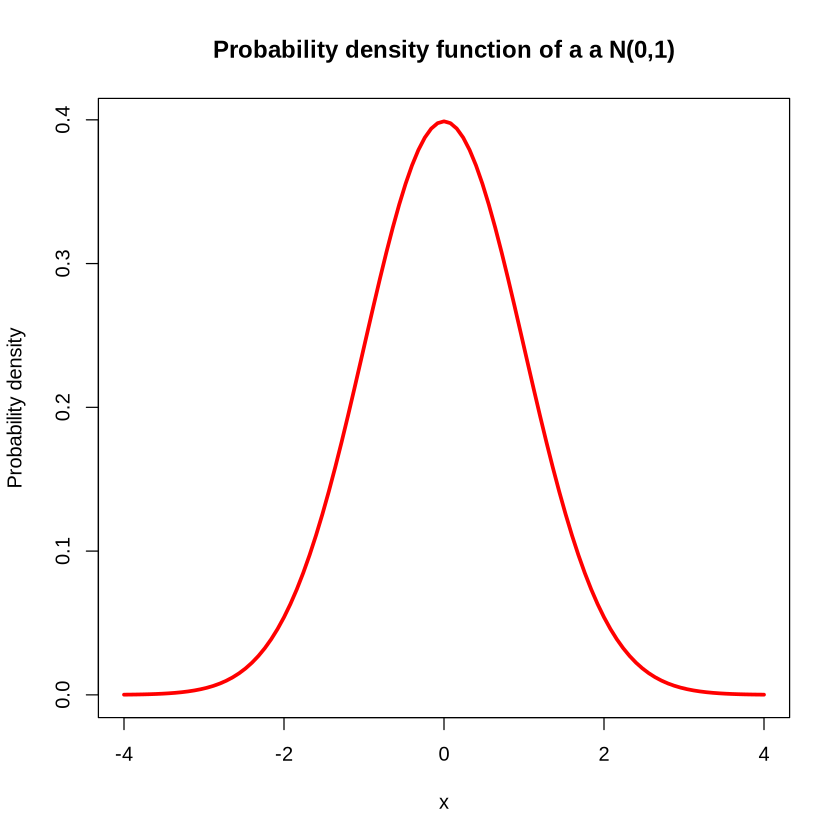

In [14]:
curve(dnorm(x), from=-4, to=4, col="red", lwd=3, ylab="Probability density", main="Probability density function of a a N(0,1)")

We can add another curve to the same plot using the argument `add=TRUE` :

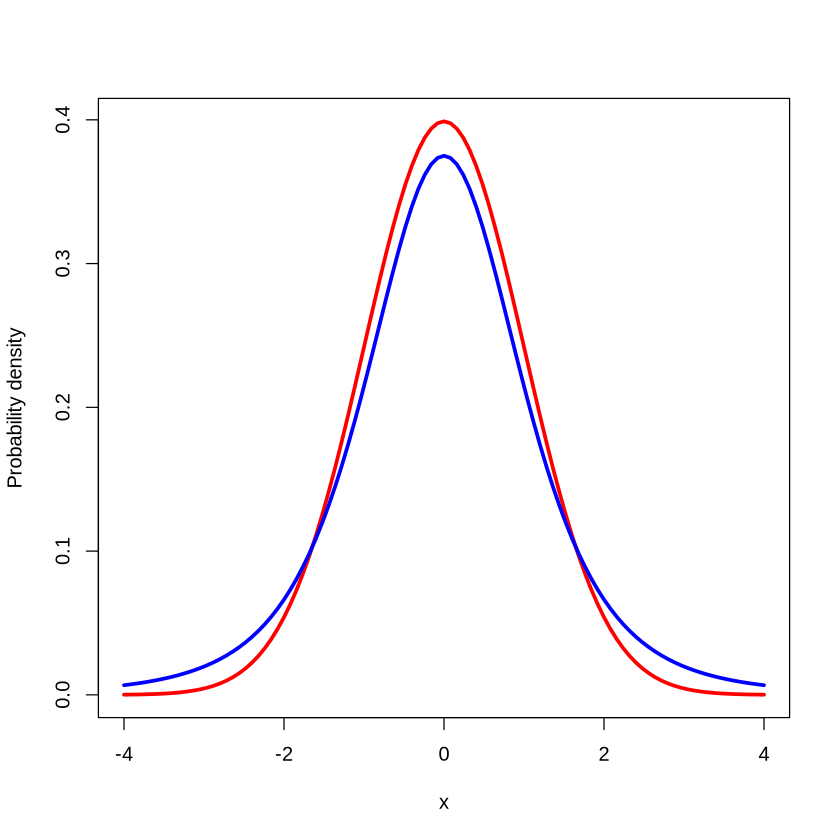

In [15]:
# N(0,1)
curve(dnorm(x), from=-4, to=4, col="red", lwd=3, ylab="Probability density")
# t(4)
curve(dt(x, 4), col="blue", lwd=3, add=TRUE)

In this case, we have added the probability density function of the Student's t-distribution with 4 degrees of freedom. This is another common bell-shaped distribution.

Since there are two lines in the same plot, we should distinguish them using a legend:

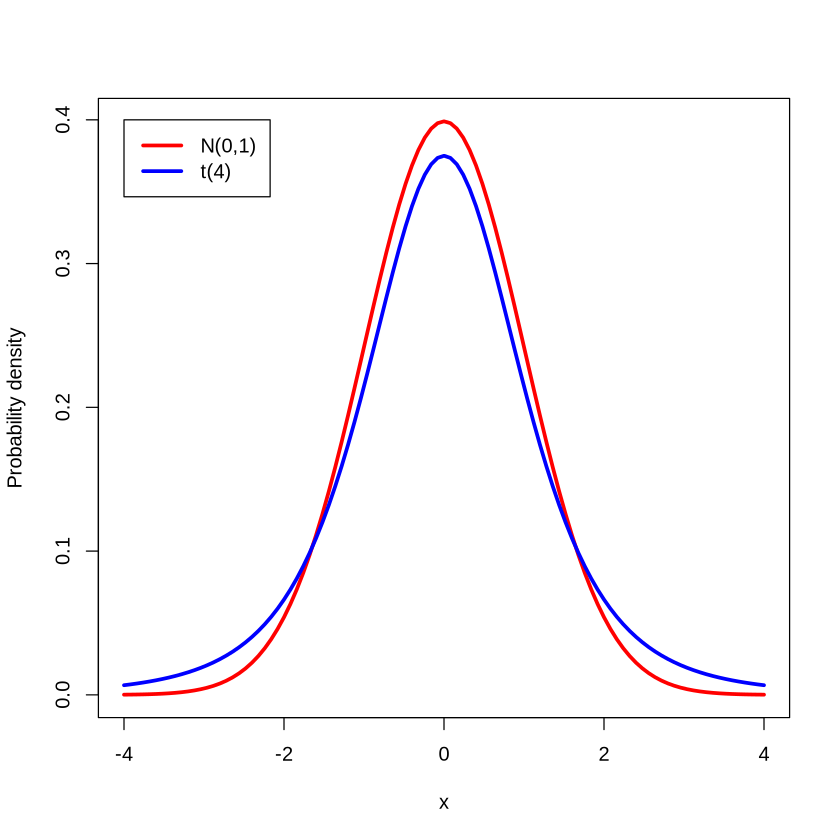

In [17]:
# N(0,1)
curve(dnorm(x), from=-4, to=4, col="red", lwd=3, ylab="Probability density")
# t(4)
curve(dt(x, 4), col="blue", lwd=3, add=TRUE)
legend(-4, 0.4, legend=c("N(0,1)", "t(4)"), col=c("red","blue"), lwd=3)

The first two arguments of the `legend` function specify the position of the upper-left corner of the legend. The resulting plot displays the two density functions: the N(0,1) distribution in red and the Student's t-distribution with 4 degrees of freedom in blue.

By changing the degrees of freedom, we can observe how the Student's t-distribution approaches the standard normal distribution as the degrees of freedom increase.

To plot a discrete probability function, we can use the `plot` function. For example, to represent the probability mass function of a binomial distribution B(n=30,p=0.5) (which could describe the probability function of a random variable counting the number of heads when flipping a coin 30 times), we can run the following commands:

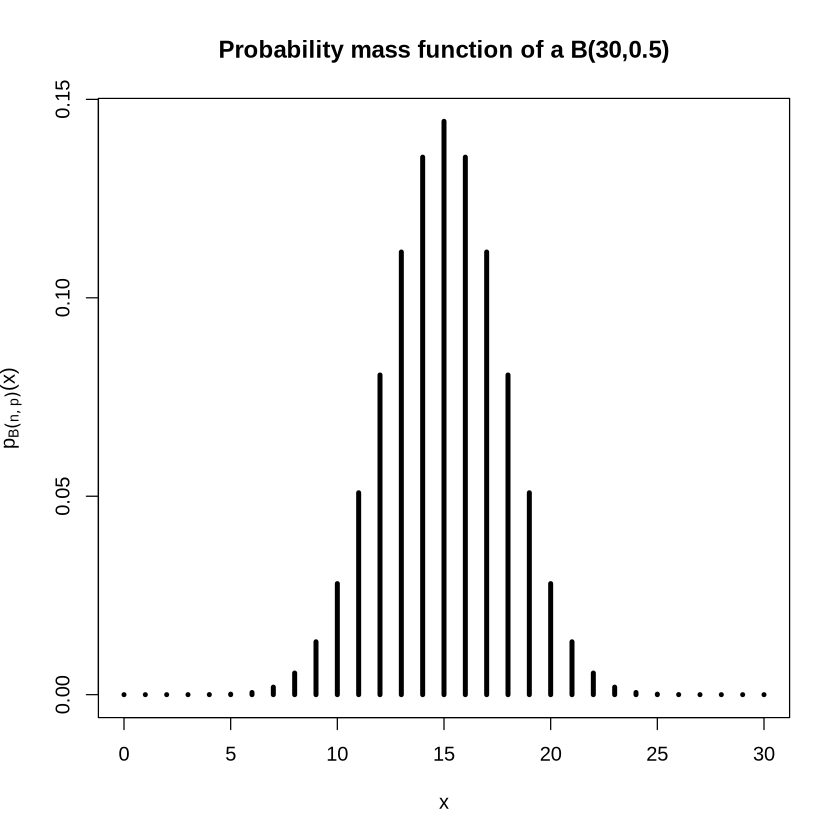

In [19]:
# PDF of B(30,0.5)
n <- 30
p <- 0.5
x.i <- 0:n
plot(x.i, dbinom(x.i,n,p), type="h", lwd=4, xlab="x", 
     ylab=expression('p'[B(n,p)]*'(x)'), main="Probability mass function of a B(30,0.5)")

In the previous figure, as expected, we observe that there is a higher probability of obtaining an equal number of heads and tails, while it is very unlikely to get all or almost all heads, as well as none or almost no heads.

Try changing the value of p in the previous code to values close to 0 or close to 1 and observe the changes in the graph.

It is worth noting that in the previous code, the argument `type="h"` was used so that the `plot` function draws vertical impulses at each value instead of connecting the points with lines.

The cumulative distribution functions of discrete variables can be plotted with their jumps by defining the following function:

In [21]:
plot.FX.discrete <- function(pdist, rng, ...){
x.i <- seq(floor(rng[1]),ceiling(rng[2]))
x.i <- x.i[pdist(x.i, ...)-pdist(x.i-1, ...)!=0]
y.i <- pdist(x.i, ...)
ym1.i <- pdist(x.i-1, ...)
plot(2,xlim=rng, ylim=c(0,1),xlab="x",ylab="Cumulative distribution function")
segments(x.i, y.i, x.i+1, y.i, lwd=2)
segments(rng[1],0,x.i[1],0, lwd=2)
segments(x.i[length(x.i)], 1, rng[2],1, lwd=2)
segments(x.i, ym1.i, x.i, y.i, lty="dotted")
points(x.i, y.i, pch=20)
}

which we will call in the following code that represents the cumulative distribution function of a B(10,0.8):

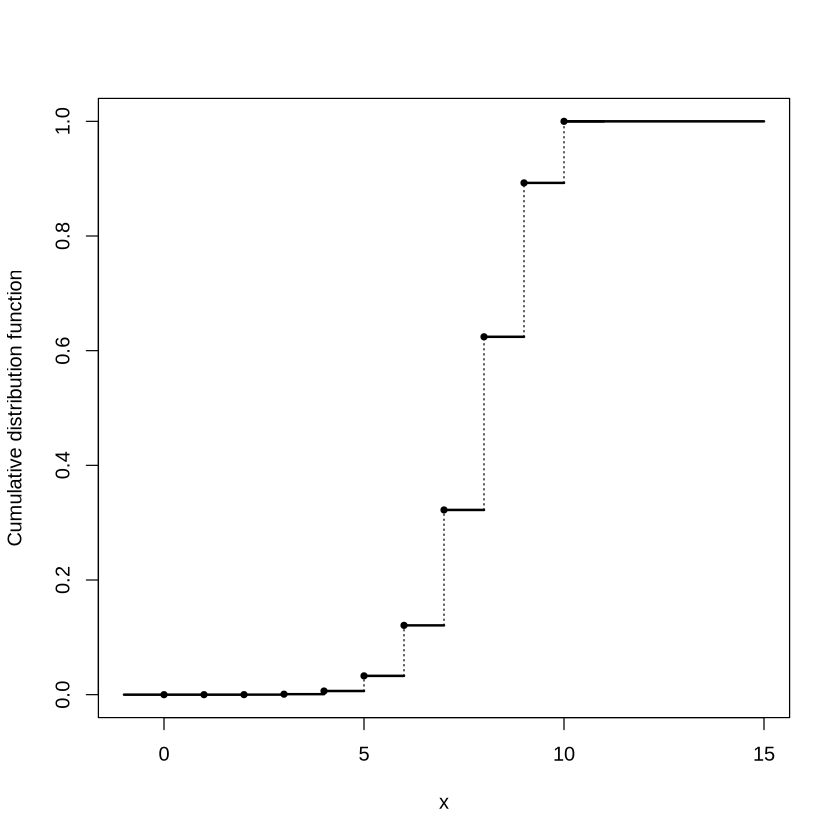

In [22]:
xlimits <- c(-1,15) # Range to plot
# FX(x) with X~B(10,0.8)
plot.FX.discrete(pbinom, xlimits, 10,0.8)

Or to represent the cumulative distribution function of a Po(5):

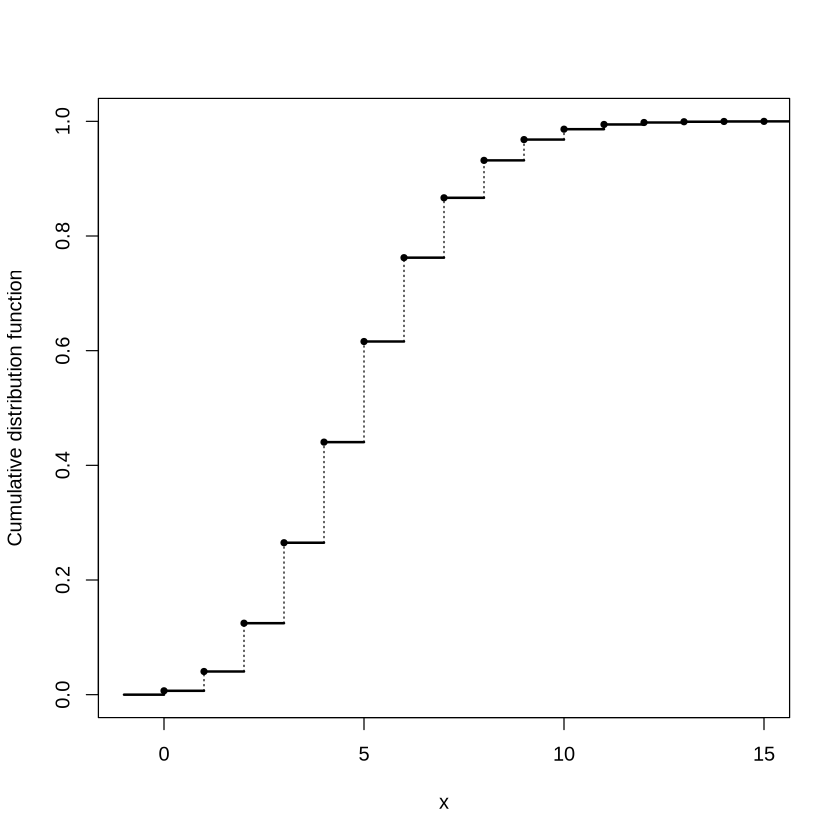

In [23]:
# FX(x) with X~Po(5)
plot.FX.discrete(ppois, xlimits, 5)

We can combine the previous function with the `curve` function to verify how the binomial distribution tends to the normal distribution when n is sufficiently large and p is not close to 0 or 1:

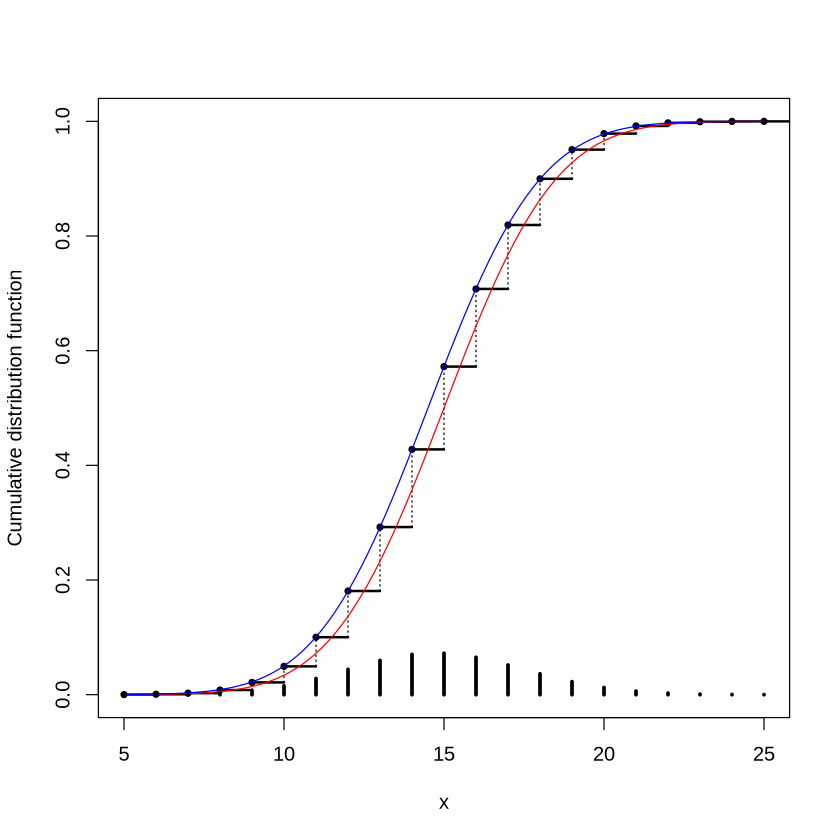

In [24]:
# B(30,0.5)
n <- 30
p <- 0.5
xlimits <- c(5,25)
mean_val <- n*p
std_val <- sqrt(n*p*(1-p))
# FX(x) with X~B(30,0.5)
plot.FX.discrete(pbinom, xlimits, n, p)
# Normal approximation 
curve(pnorm(x,mean_val,std_val), col="red", add=TRUE)
# Normal approximation with continuity correction
curve(pnorm(x+0.5,mean_val,std_val), col="blue", add=TRUE)
# Error
lines(0:n, abs(pbinom(0:n,n,p)-pnorm(0:n,mean_val,std_val)), type="h",lwd=3)

In the resulting graph, the distribution function of a B(30,0.5) variable is represented in black, while its approximation using the normal distribution with and without continuity correction is shown in blue and red, respectively.

The vertical bars drawn at the bottom of the graph indicate the error introduced when approximating this binomial distribution with a normal distribution. This error is computed within the `lines` function in the previous code.

<div class="alert alert-block alert-info">
<strong>PRACTICA ON YOUR OWN</strong>

- If we roll a die 288 times, calculate the probability of obtaining a 5 or 6 more than 90 times and less than 120 times.
Verify the obtained value by representing the distribution function associated with this experiment.
     
</n>

- An engineer has a probability of 0.02 of making a significant mistake when carrying out a project. 
  1. Determine the probability of making 2 mistakes if they complete 20 projects.
  2. Calculate the probability of making the first mistake on the sixth project.
  3. If making 10 mistakes leads to dismissal from the company, calculate the probability of being dismissed if they complete 40 projects.
  4. And what about being dismissed after completing the 15th project?

</n>

- The height of 1000 high school students follows a normal distribution with a mean of 168 cm and a standard deviation of 5 cm.
    1. Represent the probability density function of this distribution.
    2. The range of values around the mean that contains 95% of the students.
    3. The range of values around the mean that contains 50% of the students.
    4. The minimum height of the top 15% of the tallest students.
    5. The minimum height of the top 5% of the tallest students.

</div>